In [1]:
!pip install opencv-python matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 1.1 MB/s eta 0:00:34
    --------------------------------------- 0.5/38.6 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.5/38.6 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.6 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.1/38.6 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.4/38.6 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.7/38.6 MB 3.7 MB/s eta 0:00:10
   - -------------------------

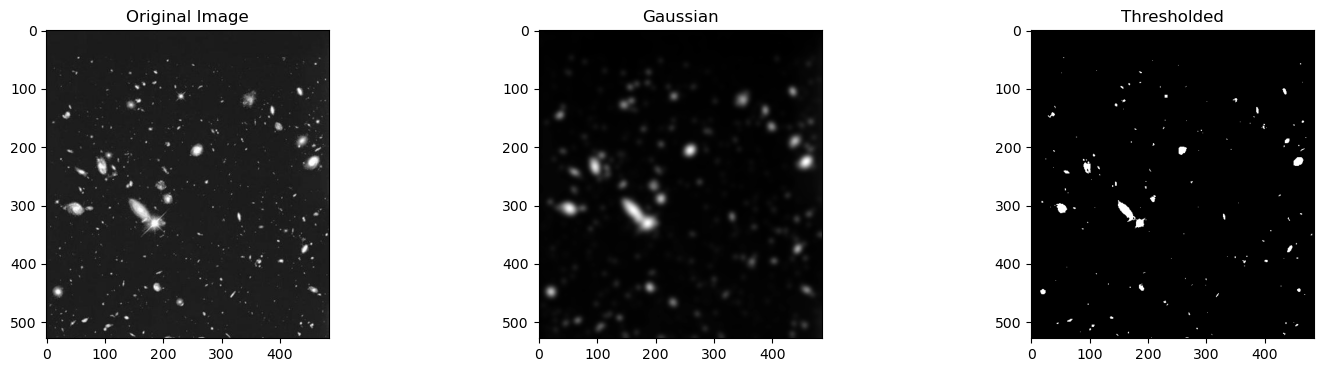

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply a lowpass filter with a Gaussian kernel to the input image
def apply_gaussian_lowpass(image, kernel_size):
    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

# Function to threshold the filtered image and scale the values to the range [0, 1]
def threshold_and_scale(image, threshold_value):
    # Threshold the image
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Normalize the values to the range [0, 1]
    scaled_image = cv2.normalize(thresholded_image, None, 0, 1, cv2.NORM_MINMAX)
    
    return scaled_image

# Function to display original and processed images
def display_images(original, processed1, processed2, title1, title2, title3):
    plt.figure(figsize=(18, 4))
    
    # Display the original image
    plt.subplot(131), plt.imshow(original, cmap='gray'), plt.title('Original Image')
    
    # Display the processed image with Gaussian blur
    plt.subplot(132), plt.imshow(processed1, cmap='gray'), plt.title(title2)
    
    # Display the processed image with thresholding and scaling
    plt.subplot(133), plt.imshow(processed2, cmap='gray'), plt.title(title3)
    
    # Show the plot
    plt.show()

# Main function
def main():
    # Read the Hubble telescope image from the same directory
    input_image = cv2.imread('HW_Image1.tif', cv2.IMREAD_GRAYSCALE)

    # Define the Gaussian kernel size for blurring
    blur_kernel_size = 25  # Adjust this value for your desired blur strength

    # Apply Gaussian lowpass filter for blurring
    blurred_image = apply_gaussian_lowpass(input_image, blur_kernel_size)

    # Adjust the threshold value for binary image
    threshold_value = 180

    # Threshold the original image and scale it
    thresholded_scaled_image = threshold_and_scale(input_image, threshold_value)

    # Display the original and processed images
    display_images(input_image, blurred_image, thresholded_scaled_image,
                   f'Gaussian Blur (Size {blur_kernel_size})', 'Gaussian', 'Thresholded')

if __name__ == "__main__":
    main()


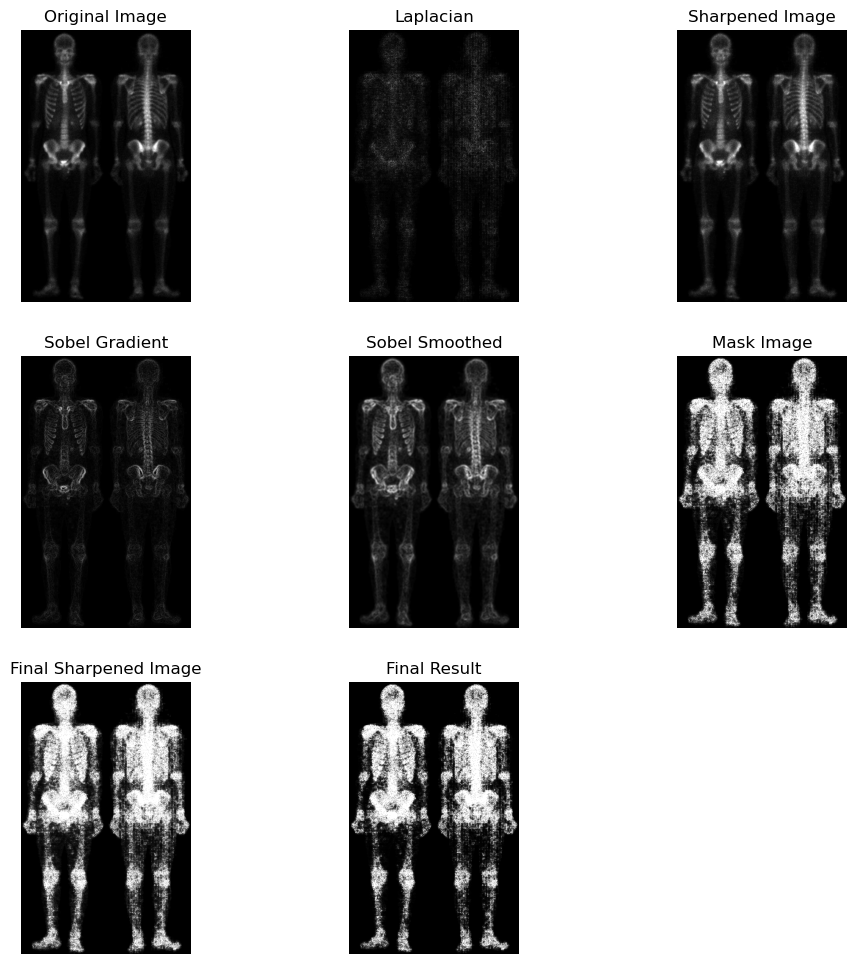

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'HW_Image2.tif'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# (a) Laplacian
laplacian = cv2.Laplacian(original_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# (c) Sharpened image by adding (a) and (b)
sharpened_image = cv2.add(original_image, laplacian)

# (d) Sobel gradient
sobel_gradient_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_gradient_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_gradient = cv2.magnitude(sobel_gradient_x, sobel_gradient_y)

# (e) Sobel image smoothed with a 5*5 box filter
sobel_smoothed = cv2.blur(sobel_gradient.astype(np.uint8), (5, 5))

# (f) Mask image formed by the product of (b) and (e)
mask_image = cv2.multiply(laplacian, sobel_smoothed)

# (g) Sharpened image by adding (a) and (f)
sharpened_image_final = cv2.add(original_image, mask_image)

# (h) Final result obtained by applying a power-law transformation to (g)
gamma = 1.5  # You can adjust the gamma value
final_result = np.power(sharpened_image_final / float(np.max(sharpened_image_final)), gamma) * 255.0

# Convert to uint8
final_result = np.uint8(final_result)

# Display the images using matplotlib
plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(3, 3, 1), plt.imshow(original_image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

# Laplacian
plt.subplot(3, 3, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.axis('off')

# Sharpened Image
plt.subplot(3, 3, 3), plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image'), plt.axis('off')

# Sobel Gradient
plt.subplot(3, 3, 4), plt.imshow(sobel_gradient, cmap='gray')
plt.title('Sobel Gradient'), plt.axis('off')

# Sobel Smoothed
plt.subplot(3, 3, 5), plt.imshow(sobel_smoothed, cmap='gray')
plt.title('Sobel Smoothed'), plt.axis('off')

# Mask Image
plt.subplot(3, 3, 6), plt.imshow(mask_image, cmap='gray')
plt.title('Mask Image'), plt.axis('off')

# Final Sharpened Image
plt.subplot(3, 3, 7), plt.imshow(sharpened_image_final, cmap='gray')
plt.title('Final Sharpened Image'), plt.axis('off')

# Final Result
plt.subplot(3, 3, 8), plt.imshow(final_result, cmap='gray')
plt.title('Final Result'), plt.axis('off')

plt.show()


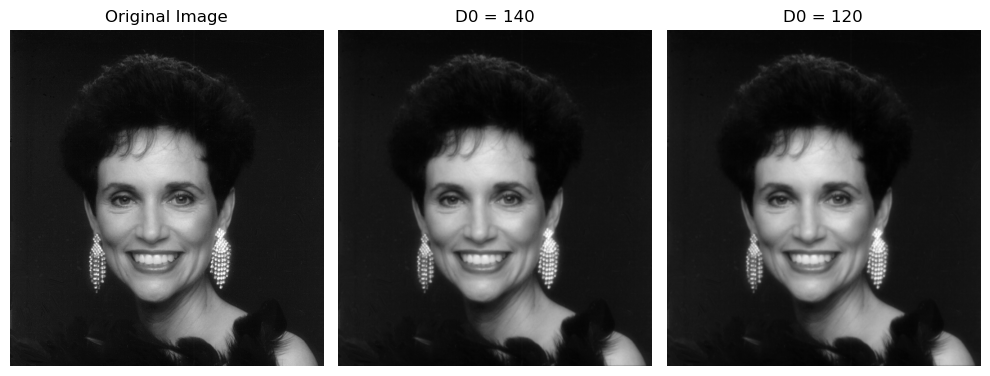

In [56]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def butterworth_lowpass_filter(img, D0, n):
    # Apply FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    # Create Butterworth low-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (d / D0) ** (2 * n))
    
    # Apply the mask
    fshift_filtered = fshift * mask
    
    # Apply inverse FFT
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    return img_back

# Load the input image
img = cv2.imread('HW_Image3.tif', cv2.IMREAD_GRAYSCALE)

# Apply Butterworth low-pass filter with D0 = 140 and n = 1
filtered_img_140 = butterworth_lowpass_filter(img, 140, 1)

# Apply Butterworth low-pass filter with D0 = 120 and n = 1
filtered_img_120 = butterworth_lowpass_filter(img, 120, 1)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_img_140, cmap='gray')
plt.title('D0 = 140')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img_120, cmap='gray')
plt.title('D0 = 120')
plt.axis('off')

plt.tight_layout()
plt.show()
